<a href="https://colab.research.google.com/github/arcrowell/Decision-Optimization-Simulation/blob/main/DOS_Problem_Set_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Set 3

In [284]:
import pyarrow
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import norm

In [285]:
#Load feather file from Github
df_spot = pd.read_feather("https://raw.githubusercontent.com/ncrowder/datacamp/main/sampling_in_python/spotify_2000_2020.feather")
df_spot

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.1100,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.2220,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.4000,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.3500,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.2790,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41651,0.17300,"['DripReport', 'Tyga']",0.875,163800.0,2.730000,0.443,1.0,4KppkflX7I3vJQk7urOJaS,0.000032,1.0,0.0891,-7.461,1.0,Skechers (feat. Tyga) - Remix,75.0,2020-05-15,0.1430,100.012,0.3060,2020.0
41652,0.01670,"['Leon Bridges', 'Terrace Martin']",0.719,167468.0,2.791133,0.385,0.0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8.0,0.1110,-10.907,1.0,Sweeter (feat. Terrace Martin),64.0,2020-06-08,0.0403,128.000,0.2700,2020.0
41653,0.53800,"['Kygo', 'Oh Wonder']",0.514,180700.0,3.011667,0.539,0.0,52eycxprLhK3lPcRLbQiVk,0.002330,7.0,0.1080,-9.332,1.0,How Would I Know,70.0,2020-05-29,0.1050,123.700,0.1530,2020.0
41654,0.07140,"['Cash Cash', 'Andy Grammer']",0.646,167308.0,2.788467,0.761,0.0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1.0,0.2220,-2.557,1.0,I Found You,70.0,2020-02-28,0.0385,129.916,0.4720,2020.0


##Problem 1

In [286]:
#Generate a samp20 dataframe from a random sample of 20 rows.
samp20 = df_spot.sample(n=20, random_state = 100)
samp20

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
20043,0.005330,['Otto Knows'],0.679,357507.0,5.958450,0.732,0.0,2nIDPOUOprhe14XoCK6gxw,0.117000,3.0,0.0880,-7.089,1.0,Million Voices,44.0,2012-01-01,0.0526,125.981,0.268,2012.0
33988,0.177000,['Teriyaki Boyz'],0.762,255173.0,4.252883,0.896,0.0,1Gk5fwOwrZs379XdVzQ1gq,0.000065,6.0,0.0673,-5.367,1.0,"Tokyo Drift (Fast & Furious) - From ""The Fast ...",49.0,2006-01-01,0.1340,127.029,0.939,2006.0
8724,0.038000,['Red Hot Chili Peppers'],0.442,215667.0,3.594450,0.986,0.0,5pAGl4nTCwcXdce769jJuI,0.000820,0.0,0.0998,-2.466,1.0,By the Way,47.0,2003-11-18,0.1170,124.014,0.184,2003.0
2628,0.457000,"['Aaron Lohr', 'Wayne Wilcox', 'Cast Of The Mo...",0.157,166333.0,2.772217,0.382,0.0,0OuPMjmicFfmnB3SFFqdgQ,0.000000,6.0,0.1670,-8.875,1.0,Will I,45.0,2005-09-27,0.0313,178.017,0.380,2005.0
33696,0.008420,['blink-182'],0.401,161136.0,2.685600,0.981,0.0,5TxY7O9lFJJrd22FmboAXe,0.000032,0.0,0.1060,-4.926,1.0,Stockholm Syndrome,51.0,2003-11-01,0.0876,173.182,0.484,2003.0
2571,0.000042,['Strung Out'],0.521,175827.0,2.930450,0.896,0.0,6kXCBheyqOjVbNkJoj2yE9,0.024200,1.0,0.1470,-4.686,1.0,Analog,47.0,2004,0.0510,106.997,0.421,2004.0
35396,0.000128,['Black Eyed Peas'],0.603,407520.0,6.792000,0.913,0.0,2y4BoHqqK7awqNGS7RgVoo,0.139000,7.0,0.0341,-5.969,1.0,I Gotta Feeling,1.0,2020-06-12,0.0382,128.000,0.488,2020.0
5767,0.009430,"['Bassnectar', 'Lafa Taylor']",0.507,282273.0,4.704550,0.934,0.0,3NPYT4nilQ6YW1uA8I7orI,0.001800,8.0,0.2220,-2.325,0.0,Speakerbox (feat. Lafa Taylor),57.0,2015-06-30,0.1880,175.954,0.471,2015.0
3113,0.596000,['Maroon 5'],0.502,240787.0,4.013117,0.412,0.0,3M1aZaO65nz2yuA5g8LIVQ,0.000000,3.0,0.0969,-8.262,1.0,If I Ain’t Got You - Live,48.0,2010,0.0270,114.344,0.221,2010.0
6746,0.338000,['Muse'],0.296,280627.0,4.677117,0.683,0.0,5cvFycFL4BTMA3dHSstMqi,0.195000,0.0,0.0917,-8.932,1.0,Falling Away with You,50.0,2004-03-23,0.0361,95.483,0.272,2004.0


##Problem 2

In [287]:
#Generate a samp2per dataframe from a random sample of 2% of the rows.
samp2per = df_spot.sample(frac=0.02, random_state = 100)
samp2per

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
20043,0.00533,['Otto Knows'],0.679,357507.0,5.958450,0.732,0.0,2nIDPOUOprhe14XoCK6gxw,0.117000,3.0,0.0880,-7.089,1.0,Million Voices,44.0,2012-01-01,0.0526,125.981,0.268,2012.0
33988,0.17700,['Teriyaki Boyz'],0.762,255173.0,4.252883,0.896,0.0,1Gk5fwOwrZs379XdVzQ1gq,0.000065,6.0,0.0673,-5.367,1.0,"Tokyo Drift (Fast & Furious) - From ""The Fast ...",49.0,2006-01-01,0.1340,127.029,0.939,2006.0
8724,0.03800,['Red Hot Chili Peppers'],0.442,215667.0,3.594450,0.986,0.0,5pAGl4nTCwcXdce769jJuI,0.000820,0.0,0.0998,-2.466,1.0,By the Way,47.0,2003-11-18,0.1170,124.014,0.184,2003.0
2628,0.45700,"['Aaron Lohr', 'Wayne Wilcox', 'Cast Of The Mo...",0.157,166333.0,2.772217,0.382,0.0,0OuPMjmicFfmnB3SFFqdgQ,0.000000,6.0,0.1670,-8.875,1.0,Will I,45.0,2005-09-27,0.0313,178.017,0.380,2005.0
33696,0.00842,['blink-182'],0.401,161136.0,2.685600,0.981,0.0,5TxY7O9lFJJrd22FmboAXe,0.000032,0.0,0.1060,-4.926,1.0,Stockholm Syndrome,51.0,2003-11-01,0.0876,173.182,0.484,2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28451,0.05640,['Granger Smith'],0.629,206600.0,3.443333,0.834,0.0,6n8867qPhHITHka3ZJYjr8,0.000000,0.0,0.1020,-3.559,1.0,The Country Boy Song (feat. Earl Dibbles Jr.),57.0,2013-04-16,0.0597,84.000,0.669,2013.0
17657,0.54100,['Ryan Bingham'],0.695,371440.0,6.190667,0.238,0.0,38wl30PS8GaNmwLblsQerL,0.009880,4.0,0.1290,-13.726,0.0,All Choked Up Again,43.0,2010-01-01,0.0415,136.449,0.184,2010.0
5562,0.00184,['New Politics'],0.583,202107.0,3.368450,0.719,0.0,3ym8RPF4EQPqtW0v8G44BT,0.035600,6.0,0.0919,-5.643,1.0,Tonight You're Perfect,50.0,2013-05-17,0.0350,123.999,0.299,2013.0
4446,0.40500,['Ryan Adams'],0.418,220680.0,3.678000,0.240,0.0,2cSReP67LziR3PeYQ8Ehm2,0.000077,7.0,0.0781,-10.780,1.0,Desire,47.0,2002-01-01,0.0337,154.431,0.202,2002.0


##Problem 3

In [288]:
#Generate a random sample of 1% of the ‘duration_ms’ column and compute the mean of the sample and the mean of the full dataset.
min_duration_samp = df_spot['duration_ms'].sample(frac=0.01, random_state=100)
mean_dsamp = np.mean(min_duration_samp)
print(f'Mean of duration sample: {mean_dsamp}')
mean_og = np.mean(df_spot['duration_ms'])
print(f'Mean of duration full dataset: {mean_og}')

diff = abs(mean_dsamp - mean_og)
per_err = (abs(mean_dsamp - mean_og)/abs(mean_og))*100
#What is the difference in milliseconds and as a percentage error?
#Difference in milliseconds = 1642.41ms
#Percentage error = 71%
print(f'Difference in milliseconds: {diff}')
print(f'Percentage error: {per_err}')

Mean of duration sample: 232771.5251798561
Mean of duration full dataset: 231129.1148454004
Difference in milliseconds: 1642.4103344556934
Percentage error: 0.7106029612730886


##Problem 4

In [289]:
#Sort the dataframe by ‘duration_ms’ using the sort_values method and then find the mean ‘energy’ of the top 50 rows.
#Answer = 0.53
sorted_energy = samp2per.sort_values(by='duration_ms', ascending=True)['energy'].head(50)
sorted_energy_mean = sorted_energy.mean()
print(f'Sorted energy mean: {sorted_energy_mean}')

#Compare this with the mean ‘energy’ of the full dataset.
#Answer = 0.64
full_energy_mean = df_spot['energy'].mean()
print(f'Full dataset energy mean: {full_energy_mean}')
#What is the difference?
#Answer = 0.11 is the mean difference in the energy column.
print(f'Difference between means: {abs(sorted_energy_mean - full_energy_mean)}')

Sorted energy mean: 0.5322664060000001
Full dataset energy mean: 0.6442850514931823
Difference between means: 0.11201864549318219


##Problem 5

Comment on any perceived differences.

The sample set seems to declare that most songs are between 0.7 and 0.8 energy level, it cannot be determined the skew of the data.  Whereas the energy level of the entire dataset shows a skewed left dataset with most of the songs between 0.7 and 0.8. The histograms do show visually the difference between the means as the entire dataset gives the clearer picture.

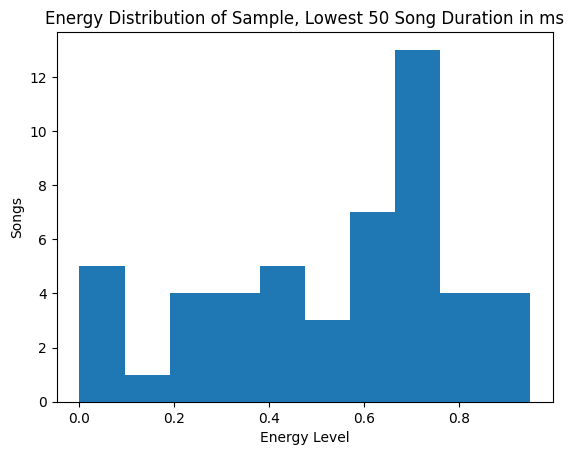

In [290]:
#Generate a histogram of the ‘energy’ from the top 50 rows after sorting
plt.hist(sorted_energy, bins=10)
plt.title('Energy Distribution of Sample, Lowest 50 Song Duration in ms')
plt.xlabel('Energy Level')
plt.ylabel('Songs')
plt.show()

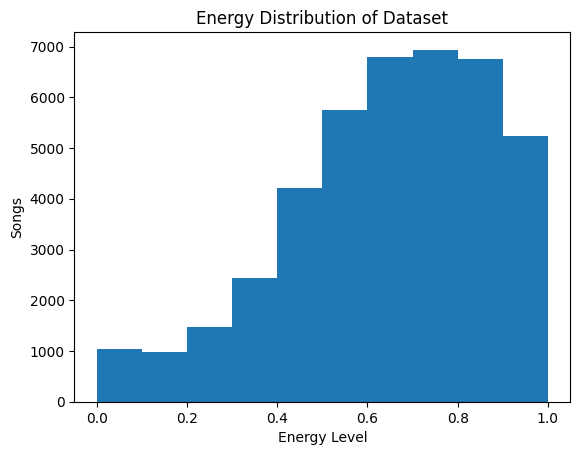

In [291]:
#Generate a histogram of the full dataset’s ‘energy’ level.
plt.hist(df_spot['energy'])
plt.title('Energy Distribution of Dataset')
plt.xlabel('Energy Level')
plt.ylabel('Songs')
plt.show()
plt.show()

##Problem 6

In [292]:
#Using the original dataset, find the standard deviation of the ‘tempo’ of every 4th row.

every_fourth = df_spot.iloc[::4]
every_fourth

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.972000,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.1100,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
4,0.122000,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.2790,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0
8,0.000400,['Godsmack'],0.505,334893.0,5.581550,0.617,0.0,1losCJa0dcFV6HgZoqEESf,0.013100,8.0,0.4210,-7.744,1.0,Spiral,41.0,2000-10-31,0.0251,96.976,0.4170,2000.0
12,0.988000,"['The Cathedral Singers', 'Lorelei McDermott',...",0.233,248600.0,4.143333,0.122,0.0,4IyK8htJJzbRjPihpMouWu,0.003540,10.0,0.0916,-19.528,1.0,"Ave Maria, Op. 52 No. 6, D. 839 (Arr. for Sopr...",52.0,2000-01-01,0.0333,90.593,0.0991,2000.0
16,0.000061,['The Clarks'],0.314,195067.0,3.251117,0.688,0.0,1liqxWv5Stjdtor4n3S9cZ,0.000024,11.0,0.1460,-7.524,1.0,Born Too Late,40.0,2000-06-20,0.0306,186.348,0.5360,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41636,0.069400,"['Lil Wayne', 'Lil Uzi Vert']",0.877,234055.0,3.900917,0.554,1.0,33NAQaVm6TRv1phc0fPsfb,0.000000,1.0,0.0521,-5.905,1.0,Multiple Flows (with Lil Uzi Vert),65.0,2020-05-29,0.3020,126.073,0.5850,2020.0
41640,0.304000,"['Kygo', 'Patrick Droney', 'Petey']",0.593,207898.0,3.464967,0.430,0.0,5vDjcNbN4m9fxWcrpR64Wu,0.000000,0.0,0.0896,-8.977,1.0,Say You Will,69.0,2020-05-29,0.0431,122.090,0.0955,2020.0
41644,0.022000,['Future'],0.854,201907.0,3.365117,0.599,1.0,05TpY5Fov3Hgfp8V1KILZ8,0.000000,1.0,0.1730,-7.406,0.0,Tycoon,66.0,2020-05-15,0.3550,157.031,0.8490,2020.0
41648,0.264000,"['Meek Mill', 'Roddy Ricch']",0.744,167845.0,2.797417,0.702,1.0,0j2CNrgtalXRGIvHMO2vzh,0.000000,7.0,0.1200,-6.255,0.0,Letter To Nipsey (feat. Roddy Ricch),66.0,2020-01-27,0.2880,91.885,0.3380,2020.0


In [293]:
std_dev_ef = every_fourth['tempo'].std()
print(f'Standard deviation of the tempo column: {std_dev_ef}')

Standard deviation of the tempo column: 31.00071541662694


##Problem 7

In [294]:
from matplotlib.artist import ArtistInspector
#What proportion of the dataset do the top 5 artists in the dataset represent?
#Use the value_counts method with the normalize argument.
top_5_artists = df_spot['artists'].value_counts(normalize=True).head(5)
print(top_5_artists)
top_5_artists_prop = top_5_artists.sum()
print(f'Proportion of the dataset for the top 5 artists: {top_5_artists_prop}')

artists
['Taylor Swift']    0.004537
['Eminem']          0.003529
['Drake']           0.003073
['BTS']             0.002809
['Mac Miller']      0.002449
Name: proportion, dtype: float64
Proportion of the dataset for the top 5 artists: 0.016396197426541192


In [295]:
#Then find the proportion of each of the top 5 artists if only looking at the rows representing one of these artists.
only_top5 = top_5_artists.index
df_spot_top5 = df_spot[df_spot['artists'].isin(only_top5)]
top5_prop = df_spot_top5['artists'].value_counts(normalize=True)
print(top5_prop)
print("Sum of proportion of top 5 artists only:", top5_prop.sum())


artists
['Taylor Swift']    0.276720
['Eminem']          0.215227
['Drake']           0.187408
['BTS']             0.171303
['Mac Miller']      0.149341
Name: proportion, dtype: float64
Sum of proportion of top 5 artists only: 1.0


##Problem 8

In [296]:
#Generate a random sample of 5% of the artists from the dataset 2 ways:
#First one allows for repeated artists to show up.
five_pct_artist_first = df_spot['artists'].sample(frac=0.05, replace=True)
five_pct_artist_first

,artists
27409,['Gavin DeGraw']
25916,['Sugarland']
10958,"['Ennio Morricone', 'Yo-Yo Ma', 'Roma Sinfonie..."
20046,['Rival Sons']
11181,['+44']
...,...
24988,['A Boogie Wit da Hoodie']
18483,"['The Gregory Brothers', 'TomSka']"
13724,['Cody Johnson']
18789,['OutKast']


In [297]:
#Second way where it is only possible that an artist shows up once in the sample.
unique_artists = df_spot['artists'].unique().tolist()
k = int(len(unique_artists)*0.05)
five_pct_artist_second = random.sample(unique_artists, k)
five_pct_artist_second

["['Nicky Jam', 'Ozuna']",
 "['T.I.', 'Drake']",
 "['Mother Nature FX']",
 "['The Lay-Backs']",
 "['Rahat Fateh Ali Khan']",
 "['Snoop Dogg', 'Master P', 'Nate Dogg', 'Butch Cassidy', 'Tha Eastsidaz']",
 "['Simple Plan', 'Sean Paul']",
 "['Eminem', 'Kendrick Lamar']",
 "['Wale', 'Kid Cudi']",
 "['Neto Bernal']",
 "['Helmet']",
 "['KIDS SEE GHOSTS', 'Ty Dolla $ign']",
 "['Citizen Cope', 'Robert Randolph']",
 "['David Nevue']",
 "['88rising', 'Joji', 'NIKI']",
 "['Carlos Rivera']",
 "['Ambiworld']",
 "['Maluma', 'Trap Capos', 'Noriel', 'Bryant Myers', 'Juhn']",
 "['John Mayer Trio']",
 "['Jay Rock', 'Kendrick Lamar', 'Future', 'James Blake']",
 "['Austyn Johnson', 'Cameron Seely', 'Hugh Jackman']",
 "['Michael Henderson']",
 "['Post Malone']",
 "['Inspiraciòn']",
 "['Eminem', 'Young M.A']",
 "['Alter Bridge']",
 "['Afroman']",
 "['The Psychedelic Furs']",
 "['Ella Eyre']",
 "['Dashboard Confessional']",
 "['Big Sean', 'Drake', 'Kanye West']",
 "['Busted']",
 "['The Killers', 'Clean Bandi

##Problem 9

In [298]:
#Using a dataset that only includes artists that show up at least 10 times,
#apply the groupby method on the ‘artists’ to take a sample of
#10% of the rows from each artist. Use a random_state of 2026.

counts = df_spot.value_counts('artists')
top_artists = counts[counts>=10].index
df_10plus = df_spot[df_spot['artists'].isin(top_artists)]
sample_10plus = df_10plus.groupby('artists').sample(frac=0.1, random_state=2026).reset_index(drop=True)
sample_10plus

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.00306,"[""D'Angelo""]",0.917,321643.0,5.360717,0.455,1.0,5ILWEn8WXPezgpHkGHDk8s,0.000742,10.0,0.7130,-8.446,0.0,Devil's Pie,50.0,2000-01-01,0.2300,92.097,0.5620,2000.0
1,0.13000,"[""D'Angelo""]",0.813,455067.0,7.584450,0.446,0.0,50k4cklYBbHthI5UDG24KU,0.040500,1.0,0.0865,-11.328,0.0,Greatdayndamornin'/Booty,41.0,2000-01-01,0.2430,82.587,0.6030,2000.0
2,0.25200,"[""Destiny's Child""]",0.704,215493.0,3.591550,0.673,0.0,4mzTKwhvv1TLRjbtUd1eW4,0.000031,1.0,0.0620,-6.021,1.0,Through With Love,37.0,2004-11-16,0.1410,82.654,0.7040,2004.0
3,0.00247,"[""Destiny's Child""]",0.835,207733.0,3.462217,0.833,0.0,31CsLSgn0HdZEVC8Bnnmvr,0.000000,1.0,0.1710,-4.364,0.0,Bootylicious,60.0,2001-05-01,0.2840,103.358,0.5860,2001.0
4,0.07710,"[""Los Player's""]",0.399,190137.0,3.168950,0.825,0.0,0Klf1z4bPRa9CVH1VnYjMj,0.000070,9.0,0.1090,-4.246,1.0,Libro De Recuerdos,37.0,2000-11-10,0.0588,185.563,0.6900,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,0.01300,['deadmau5'],0.433,633187.0,10.553117,0.444,0.0,31NiyZrUd1r4icY7xkvnWv,0.856000,8.0,0.1210,-9.911,0.0,Strobe,50.0,2009,0.0372,128.010,0.0356,2009.0
1741,0.11800,['fun.'],0.388,278373.0,4.639550,0.694,0.0,7gpy7sfWPNuOKmUNs3XQYE,0.000293,5.0,0.0820,-5.769,1.0,Carry On,62.0,2012-02-21,0.0735,145.434,0.3650,2012.0
1742,0.63200,['girl in red'],0.691,151693.0,2.528217,0.306,0.0,2zPcVDSpYNVKQ5c7jR7MXj,0.479000,9.0,0.1080,-15.651,1.0,summer depression,73.0,2018-03-03,0.0544,129.929,0.6200,2018.0
1743,0.04700,['iann dior'],0.607,127112.0,2.118533,0.462,1.0,0TK2EY9qEOo7n2c1UGUukJ,0.000000,0.0,0.0831,-9.644,1.0,18,67.0,2019-05-22,0.1020,170.039,0.5850,2019.0


##Problem 10

In [299]:
#Using the result from #9, find the mean, min and max of the
#‘loudness’ for the total dataset.
print("Mean of total dataset:", df_spot['loudness'].mean())
print("Min of total dataset:", df_spot['loudness'].min())
print("Max of total dataset:", df_spot['loudness'].max())

Mean of total dataset: -7.366856851353947
Min of total dataset: -60.0
Max of total dataset: 1.342


In [300]:
#Using the result from #9, find the mean, min and max of the
#‘loudness’ for the grouped by artist sample.
print("Mean of sample grouped by artist:", sample_10plus['loudness'].mean())
print("Min of sample grouped by artist:", sample_10plus['loudness'].min())
print("Max of sample grouped by artist:", sample_10plus['loudness'].max())

Mean of sample grouped by artist: -6.883265902578797
Min of sample grouped by artist: -37.624
Max of sample grouped by artist: -0.463


##Problem 11



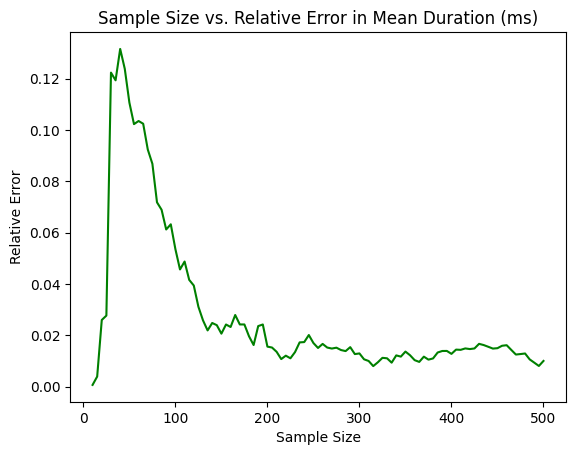

In [301]:
#Generate a plot of sample_size vs. relative_error in the mean of
#‘duration_ms’ for sample sizes ranging from 10 to 500. The
#relative_error is computed against the the true mean from the entire population.

true_mean = df_spot['duration_ms'].mean()

sample_sizes = range(10,501,5)
relative_errors = []

for i in sample_sizes:
  sample = df_spot['duration_ms'].sample(n=i, random_state=2026)
  sample_mean = sample.mean()

  rel_err = abs(true_mean - sample_mean) / abs(true_mean)
  relative_errors.append(rel_err)

plt.plot(sample_sizes, relative_errors, color='green')
plt.title('Sample Size vs. Relative Error in Mean Duration (ms)')
plt.xlabel('Sample Size')
plt.ylabel('Relative Error')
plt.show()


##Problem 12

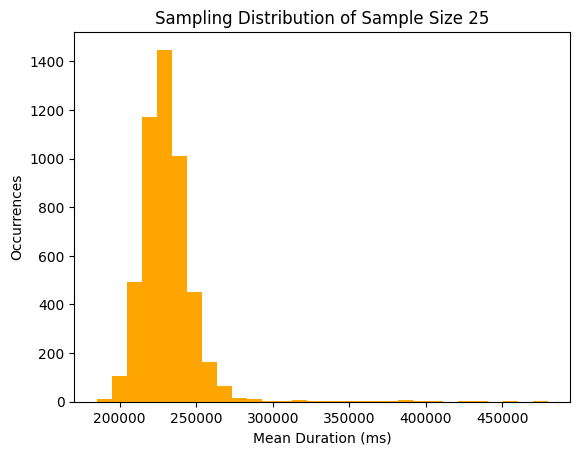

In [302]:
#Plot a sampling distribution of the mean of ‘duration_ms’ using 5000
#samples of size 25 and of size 100.

mean_samp25 = [df_spot['duration_ms'].sample(n=25, replace=True).mean()for i in range(5000)]

mean_samp100 = [df_spot['duration_ms'].sample(n=100, replace=True).mean()for i in range(5000)]

#Histogram of Sample Size 25
plt.hist(mean_samp25, bins=30, color='orange')
plt.title("Sampling Distribution of Sample Size 25")
plt.xlabel("Mean Duration (ms)")
plt.ylabel("Occurrences")
plt.show()

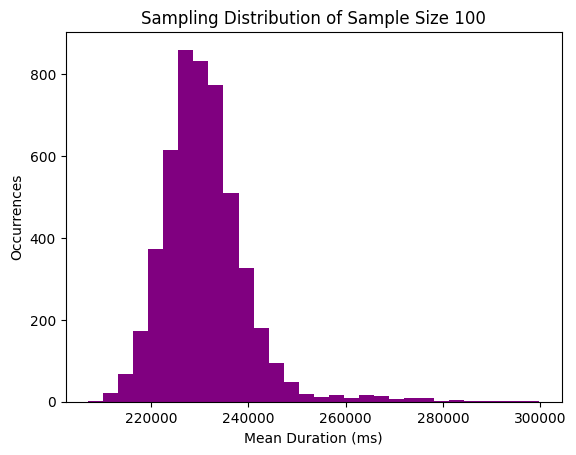

In [303]:
#Histogram of Sample Size 100
plt.hist(mean_samp100, bins=30, color='purple')
plt.title("Sampling Distribution of Sample Size 100")
plt.xlabel("Mean Duration (ms)")
plt.ylabel("Occurrences")
plt.show()

##Problem 13

In [304]:
#Find the margin of error corresponding to a 95% CI for both sampling
#distributions in #12 (n=25 and n=100) using np.quantile.

#Sampling Distribution of n=25
lower_25 = np.quantile(mean_samp25, 0.025)
upper_25 = np.quantile(mean_samp25, 0.975)
moe_25 = (upper_25 - lower_25) / 2

lower_100 = np.quantile(mean_samp100, 0.025)
upper_100 = np.quantile(mean_samp100, 0.975)
moe_100 = (upper_100 - lower_100) / 2

print(f'Margin of Error for Sample Size 25: {moe_25}')
print(f'Margin of Error for Sample Size 100: {moe_100}')

Margin of Error for Sample Size 25: 30559.68399999995
Margin of Error for Sample Size 100: 16481.899749999997


##Problem 14

Does it appear normally distributed?

*   The histogram is not normally distributed, because the majority of the loudness appears farther to right on the histogram.

Explain the shape in terms of symmetry and skewness.

*   There is a left skew of this histogram.  This would be better to use the median than the mean of the dataset to determine measure of center.

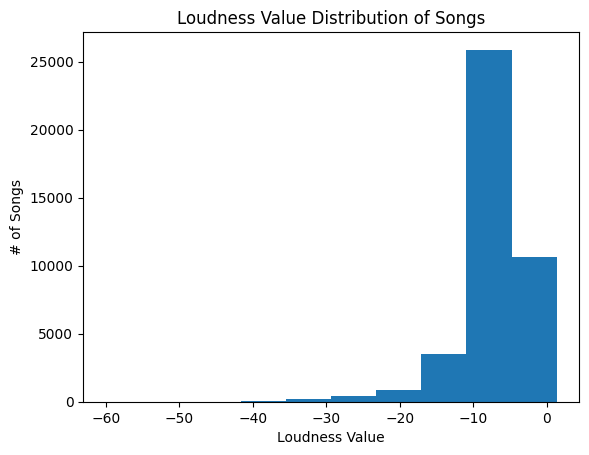

In [305]:
#Generate a histogram of the ‘loudness’ for the entire dataset.
plt.hist(df_spot['loudness'])
plt.title("Loudness Value Distribution of Songs")
plt.xlabel("Loudness Value")
plt.ylabel("# of Songs")
plt.show()

##Problem 15

In [306]:
# Select a single sample of size 100 and estimate the standard error of
#the mean ‘loudness’ using the formula: SE ~ s/sqrt(n)

single_samp100 = df_spot.sample(n=100, random_state=2026)
loudness_samp100 = single_samp100['loudness']
s = loudness_samp100.std(ddof=1)
n = len(loudness_samp100)
se = s/np.sqrt(n)
print(f'Standard error of the mean loudness for single sample size 100: {se}')

Standard error of the mean loudness for single sample size 100: 0.33945570296245925


##Problem 16

In [307]:
#Generate 5000 bootstrap samples using your sample from #14 and
#compute the mean for each one. The bootstrap standard error is the
#sample standard deviation of the 5000 bootstrap statistics. Since the
#mean of this distribution is estimated from the data, use ddof = 1.

mean_loudness_5000 = []

for i in range(5000):
  mean_loudness_5000.append(np.mean(df_spot.sample(frac=1, replace=True)['loudness']))

se_loudness_5000 = np.std(mean_loudness_5000, ddof=1)

print(f"Bootstrap Standard Error: {se_loudness_5000}")

Bootstrap Standard Error: 0.022129300653078297


##Problem 17

In [308]:
#Calculate the difference between the theoretical SE from #14 (a
#result of the CLT) and the bootstrap SE from #16.
#Hint: They should be very close.

std_dev = df_spot['loudness'].std()
n = df_spot['loudness'].count()
theoretical_se = std_dev / np.sqrt(n)

diff = abs(theoretical_se - se_loudness_5000)
print(f"Theoretical SE: {theoretical_se}")
print(f"Bootstrap SE: {se_loudness_5000}")
print(f"Absolute Difference: {diff}")

Theoretical SE: 0.02216619230245389
Bootstrap SE: 0.022129300653078297
Absolute Difference: 3.6891649375592195e-05


##Problem 18



In [309]:
#Instead of using the mean, let’s use the median or maximum (your choice) instead.
#Reproduce parts 15-17, bearing in mind that the difference should be much more dramatic, at least in terms of percent difference.

# Select a single sample of size 100 and estimate the standard error of
#the median ‘loudness’ using the formula: SE ~ s/sqrt(n)
single_samp100 = df_spot.sample(n=100, random_state=2026)
loudness_samp100 = single_samp100['loudness']
s = loudness_samp100.std(ddof=1)
n = len(loudness_samp100)
se_median = 1.2533 * (s/np.sqrt(n))
print(f'Standard error of the median loudness for single sample size 100: {se_median}')

Standard error of the median loudness for single sample size 100: 0.4254398325228502


In [310]:
#Generate 5000 bootstrap samples using your sample from #14 and
#compute the median for each one. The bootstrap standard error is the
#sample standard deviation of the 5000 bootstrap statistics. Since the
#median of this distribution is estimated from the data, use ddof = 1.

median_loudness_5000 = []

for i in range(5000):
  median_loudness_5000.append(np.median(df_spot.sample(frac=1, replace=True)['loudness']))

se_med_loudness_5000 = np.std(median_loudness_5000, ddof=1)

print(f"Bootstrap Median Standard Error: {se_med_loudness_5000}")

Bootstrap Median Standard Error: 0.016724112328510447


In [311]:
#Calculate the difference between the theoretical SE from #14 (a result of the CLT) and the bootstrap SE from #16.
#The difference should be much more dramatic, at least in terms of percent difference.

std_dev = df_spot['loudness'].std()
n = df_spot['loudness'].count()
theor_median_se = 1.2533 * (std_dev / np.sqrt(n))

difference = abs(theor_median_se - se_med_loudness_5000)
print(f"Theoretical SE: {theor_median_se}")
print(f"Bootstrap SE: {se_med_loudness_5000}")
print(f"Absolute Difference: {difference}")

Theoretical SE: 0.027780888812665463
Bootstrap SE: 0.016724112328510447
Absolute Difference: 0.011056776484155015


##Problem 19

Does the result appear normal?
*   The result does appear pretty normal with a nice bell curve shape.

Explain how this factors in to
the difference observed when comparing the means SE vs the
median/max SE.
*   For comparison, I created the means histogram as well.  Both histograms appear normal, however the x-values are different.  The x-value scale of the median ranges from -6.36 to -6.26.  The x-value scale of the mean ranges from -7.450 to -7.275.




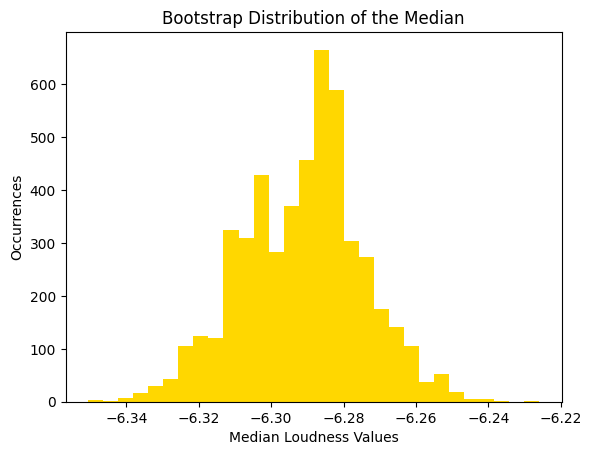

In [312]:
#The reason the results are different is because the CLT formula for estimating SE can only be applied to means.
#Generate a histogram of the bootstrap from the median/max statistic (whichever you chose in #17).

plt.hist(median_loudness_5000, bins = 30, color='gold')
plt.title('Bootstrap Distribution of the Median')
plt.xlabel('Median Loudness Values')
plt.ylabel('Occurrences')
plt.show()

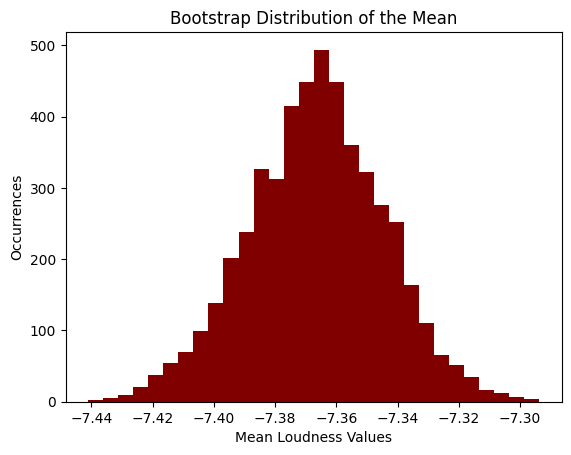

In [313]:
#Means Histogram
plt.hist(mean_loudness_5000, bins = 30, color='maroon')
plt.title('Bootstrap Distribution of the Mean')
plt.xlabel('Mean Loudness Values')
plt.ylabel('Occurrences')
plt.show()

##Problem 20

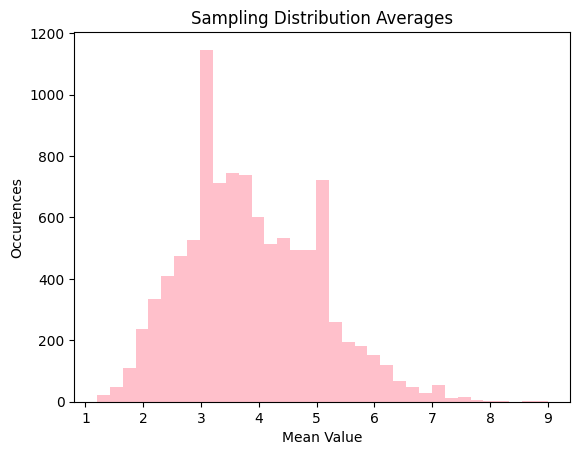

In [314]:
#Suppose we roll an 8-sided die that has the following sides = [1,2,2,3,3,4,7,9] five times and take the average of the rolls.
#Simulate doing this 10000 times and plot a sampling distribution that corresponds to this result.

die = [1,2,2,3,3,4,7,9]
rolls = 5
sims = 10000

roll_outcomes = np.random.choice(die, size=(sims, rolls))
roll_means = np.mean(roll_outcomes, axis=1)

plt.hist(roll_means, bins=35, color='pink')
plt.title(f'Sampling Distribution Averages')
plt.xlabel('Mean Value')
plt.ylabel('Occurences')
plt.show()

##Problem 21

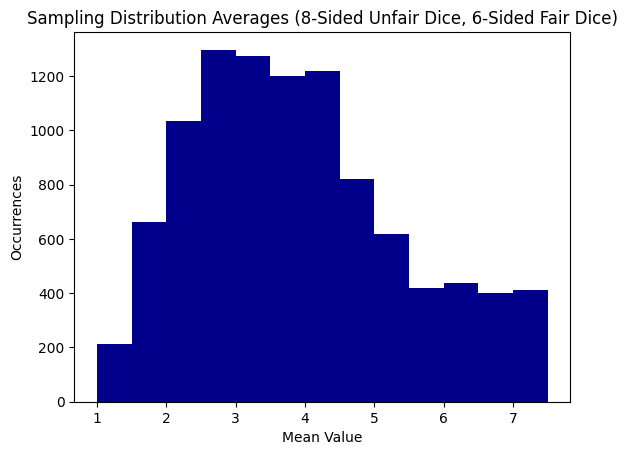

In [315]:
#Suppose now we roll the above 8-sided die along with a normal 6 sided fair die and take the average.
#Simulate doing this 10000 times and plot a sampling distribution that corresponds to this result.

sim_num = 10000
die_og = [1,2,2,3,3,4,7,9]
die_fair = [1,2,3,4,5,6]

die_og_roll_outcomes = np.random.choice(die_og, size=sim_num)
die_fair_roll_outcomes = np.random.choice(die_fair, size=sim_num)

average_roll_outcomes = (die_og_roll_outcomes + die_fair_roll_outcomes) / 2

plt.hist(average_roll_outcomes, bins=13, color='darkblue')
plt.title('Sampling Distribution Averages (8-Sided Unfair Dice, 6-Sided Fair Dice)')
plt.xlabel('Mean Value')
plt.ylabel('Occurrences')
plt.show()

##Problem 22

In [325]:
#Generate one single sample from #21 and find the margin of error (MOE)
#corresponding to a 95% confidence interval using the ppf function
#(thus using the fact that the sampling distribution will be
#normally distributed under the CLT) with loc equal to the mean of
#your single sample and standard error using the above formula for SE.

single_samp_roll = np.random.choice(average_roll_outcomes)

std_err = np.std(average_roll_outcomes) / np.sqrt(len(average_roll_outcomes))

single_samp_roll_moe = norm.ppf(0.975, loc=single_samp_roll, scale=std_err) - single_samp_roll
print(f'Percent Margin of error: {single_samp_roll_moe * 100}')

Percent Margin of error: 3.0345895826509484
